In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
# TIME SERIES
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('C:/Users/10910/Desktop/train.csv', parse_dates = True, index_col = 'Date')
store= pd.read_csv('C:/Users/10910/Desktop/store.csv')

KeyboardInterrupt: 

In [3]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1
2013-01-01,2,2,0,0,0,0,a,1
2013-01-01,3,2,0,0,0,0,a,1
2013-01-01,4,2,0,0,0,0,a,1
2013-01-01,5,2,0,0,0,0,a,1


In [4]:
print(train.shape)

(1017209, 8)


In [5]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['Month-acc'] = train.index.month+12*(train.index.year-2013)
train['Week-acc'] = train.index.weekofyear+48*(train.index.year-2013)

In [6]:
train.iloc[np.r_[0:5, -5:0]]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Month-acc,Week-acc
Date,,,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,2013,1,1,1,1,1
2013-01-01,2,2,0,0,0,0,a,1,2013,1,1,1,1,1
2013-01-01,3,2,0,0,0,0,a,1,2013,1,1,1,1,1
2013-01-01,4,2,0,0,0,0,a,1,2013,1,1,1,1,1
2013-01-01,5,2,0,0,0,0,a,1,2013,1,1,1,1,1
2015-07-31,1111,5,5723,422,1,1,0,1,2015,7,31,31,31,127
2015-07-31,1112,5,9626,767,1,1,0,1,2015,7,31,31,31,127
2015-07-31,1113,5,7289,720,1,1,0,1,2015,7,31,31,31,127
2015-07-31,1114,5,27508,3745,1,1,0,1,2015,7,31,31,31,127


In [68]:
ts = train.groupby(['Week-acc'])['Sales'].sum()
ts = ts[0:127] #start:1-127 (no NaN)
#ts.iloc[np.r_[0:7, -7:0]]

Week-acc
1      36621270
2      30767242
3      34377765
4      46040169
5      44820636
6      48510601
7      45572050
121    53115445
122    38749768
123    61628921
124     6655521
125    52008419
126    39402115
127    55085777
Name: Sales, dtype: int64

In [197]:
#ts

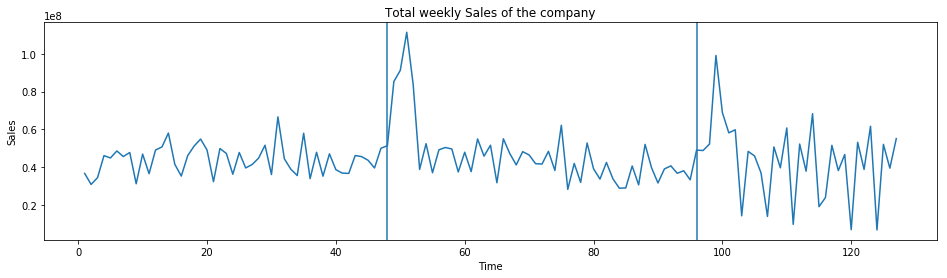

In [189]:
ts.astype('float')
plt.figure(figsize=(16,4))
plt.title('Total weekly Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
#plt.xlim(1,127)
plt.axvline(48)
plt.axvline(96)
plt.plot(ts)

In [9]:
# Stationarity tests
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



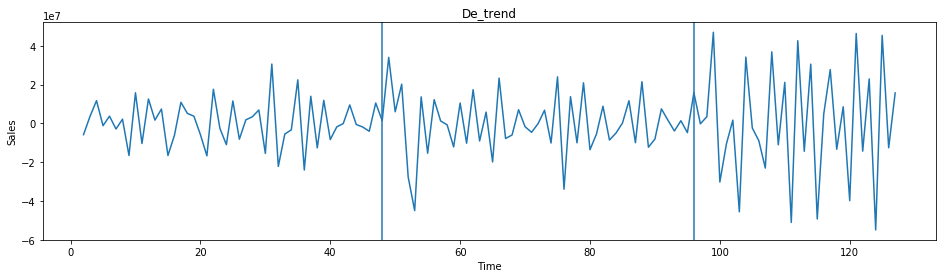

In [191]:
diff1 = ts.diff(1) #start:1-127 (1=NaN)
diff1.astype('float')
plt.figure(figsize=(16,4))
plt.title('De_trend')
plt.xlabel('Time')
plt.ylabel('Sales')
#plt.xlim(1,127)
plt.axvline(48)
plt.axvline(96)
plt.plot(diff1)

In [193]:
#diff_tr = diff1.fillna(0)
diff1_test = diff1[1:128] #No NaN in stationary test (start:2-127)
#diff1

In [199]:
#diff1_test

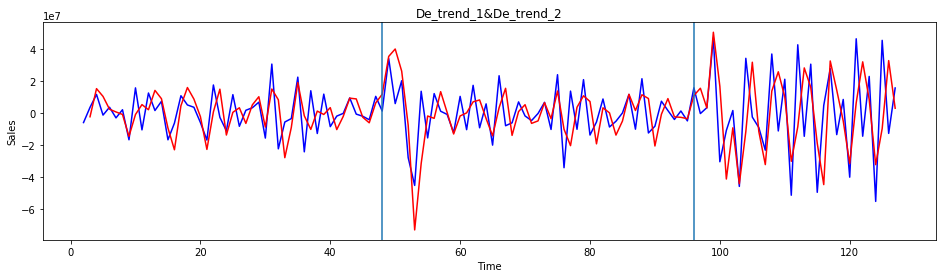

In [268]:
diff2 = ts.diff(2) #start:1-127 (1, 2=NaN)
diff2.astype('float')
plt.figure(figsize=(16,4))
plt.title('De_trend_1&De_trend_2')
plt.xlabel('Time')
plt.ylabel('Sales')
D1 = plt.plot(diff1, color='blue', label='De_trend_1')
D2 = plt.plot(diff2, color='red', label='De_trend_2')
#plt.xlim(1,127)
plt.axvline(48)
plt.axvline(96)

In [201]:
test_stationarity(diff1_test)

Results of Dickey-Fuller Test:
Test Statistic                  -4.137549
p-value                          0.000839
#Lags Used                      12.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [204]:
diff2_test = diff2[2:129]
test_stationarity(diff2_test[2:129])

Results of Dickey-Fuller Test:
Test Statistic                  -4.215538
p-value                          0.000620
#Lags Used                      13.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def determinate_order(timeseries): 
    
    #利用ACF和PACF判断模型阶数
    plot_acf(timeseries,lags=20) #延迟数
    plot_pacf(timeseries,lags=20)
    plt.show()

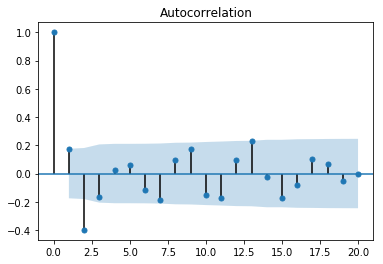

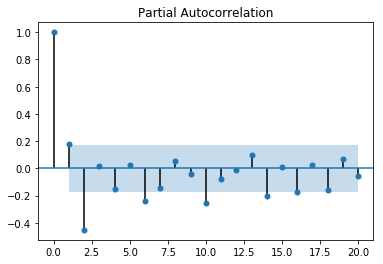

In [271]:
determinate_order(diff2_test)

In [11]:
def order_confirmation(diff):
    AIC = sm.tsa.arma_order_select_ic(diff,\
        max_ar=6,max_ma=4,ic='aic')['aic_min_order']
    BIC = sm.tsa.arma_order_select_ic(diff,max_ar=6,\
        max_ma=4,ic='bic')['bic_min_order']
    HQIC = sm.tsa.arma_order_select_ic(diff,max_ar=6,\
        max_ma=4,ic='hqic')['hqic_min_order']
    print('the AIC is{},\nthe BIC is{}\n the HQIC is{}'.format(AIC,BIC,HQIC))

In [388]:
order_confirmation(diff1_test)

the AIC is(3, 3),
the BIC is(0, 3)
 the HQIC is(3, 3)


In [205]:
order_confirmation(diff2_test)

the AIC is(4, 4),
the BIC is(1, 2)
 the HQIC is(1, 2)


In [134]:
#diff1_fit = ARIMA(diff1, (3,1,3)).fit()
diff1_fit_ARMA = ARMA(diff1, (3,3)).fit()
diff1_pred_ARMA = diff1_fit_ARMA.predict()

In [389]:
#diff1_pred_ARMA.index
#type(diff1)

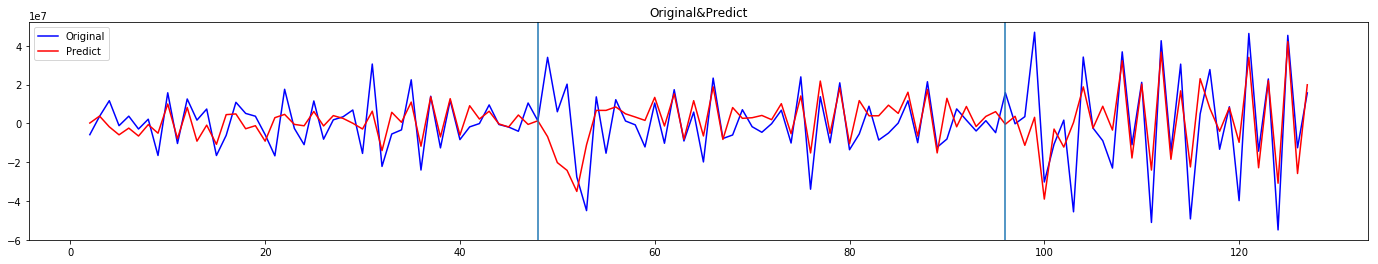

In [136]:
plt.figure(figsize=(24,4))
plt.title('Original&Predict')
orig = plt.plot(diff1, color='blue', label='Original')
predict = plt.plot(diff1_pred_ARMA, color='red', label='Predict')
plt.legend(loc='best')
plt.axvline(48)
plt.axvline(96)
plt.show()

In [12]:
from statsmodels.graphics.api import qqplot
def qqplot(diff_fit):
    resid = diff_fit.resid#残差
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    fig = qqplot(resid, line='q', ax=ax, fit=True)

In [422]:
#qqplot(diff1_fit)

In [281]:
diff1_fit_ARIMA = ARIMA(ts, (3,1,3)).fit()
diff1_pred_ARIMA = diff1_fit_ARIMA.predict()

In [304]:
#diff1_pred_ARIMA.index

In [303]:
#diff1_pred_ARIMA

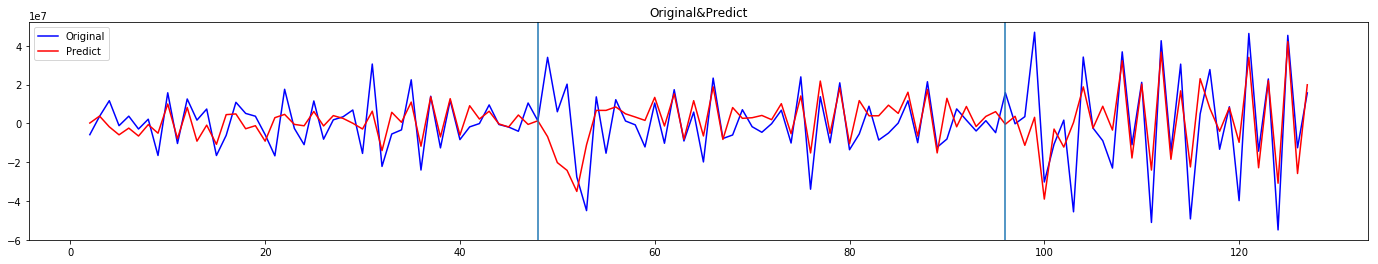

In [284]:
plt.figure(figsize=(24,4))
plt.title('Original&Predict')
orig = plt.plot(diff1, color='blue', label='Original')
predict = plt.plot(diff1_pred_ARIMA, color='red', label='Predict')
plt.legend(loc='best')
plt.axvline(48)
plt.axvline(96)
plt.show()

In [116]:
#diff1_pred_future = diff1_fit.forecast(5)
#diff1_pred_future = diff1_fit.predict(start=0, end=132)

In [245]:
#Diff1_pred_future = pd.Series(diff1_pred_future[0], index=range(128,133))
#Diff1_pred_future

In [246]:
#plt.figure(figsize=(24,4))
#plt.title('Forecast')
#predict = plt.plot(diff1_pred, color='blue', label='Predist')
#forecast = plt.plot(Diff1_pred_future, color='red', label='Forecast')
#plt.legend(loc='best')
#plt.axvline(48)
#plt.axvline(96)
#plt.show()

In [44]:
#def ts_diff_rvs(ts):
#    return np.cumsum(ts)

#diff1_pred_shift = diff1_pred.shift(1)
#diff1_pred_rev = predict_ts.add(diff_shift_ts)

In [46]:
#diff1_pred_rev = ts_diff_rvs(diff1_pred)

In [161]:
#from sklearn.model_selection import train_test_split, cross_val_predict, TimeSeriesSplit, KFold, cross_val_score
#d = {'Date':range(1,127), 'Sales_diff':diff1}
#df = pd.DataFrame(d)
#df.head()
#score = cross_val_score(ARIMA(3,1,3), 
#                        x, y, cv=TimeSeriesSplit(n_splits=2).split(df))

#df['Date'].astype('float')
#df['Sales_diff'].astype('float')
#x, y = df['Date'], df['Sales_diff']

#score = cross_val_score(ARMA(3,3), 
#                        x, y, cv=TimeSeriesSplit(n_splits=2).split(df))

In [115]:
#------------------train test split-----------------

In [302]:
#------------------De-trend_1-------------------

In [162]:
ts_train = ts[0:120] #120 start:1-120

In [248]:
#ts_train

In [293]:
train_fit_ARIMA = ARIMA(ts_train, (3,1,3)).fit()
train_pred_ARIMA = train_fit_ARIMA.predict(start=1, end=127)
train_pred_ARIMA_ = train_fit_ARIMA.predict()

In [301]:
#train_pred_ARIMA
#type(train_pred_ARIMA)

In [300]:
#train_pred_ARIMA_

In [299]:
train_pred_ARIMA_fu = np.array(train_pred_ARIMA)
train_pred_ARIMA_fu_series = pd.Series(train_pred_ARIMA_fu, index=(range(2,129)))
#train_pred_ARIMA_fu_series

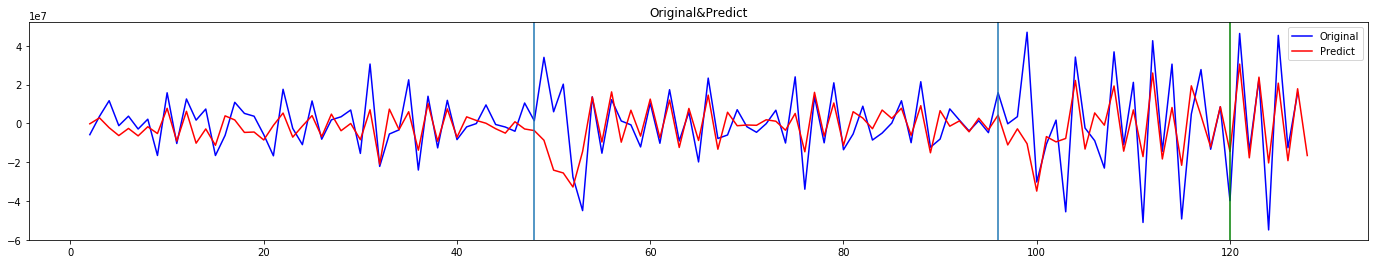

In [298]:
plt.figure(figsize=(24,4))
plt.title('Original&Predict')
orig = plt.plot(diff1, color='blue', label='Original') #start:2-127 (length=126)
predict = plt.plot(train_pred_ARIMA_fu_series, color='red', label='Predict')
plt.legend(loc='best')
plt.axvline(48)
plt.axvline(96)
plt.axvline(120, color='green')
plt.show()

In [382]:
y_pred_1 = train_pred_ARIMA_fu_series[119:126]
y_test_1 = diff1[120:127]

In [383]:
y_pred_1

121    3.052538e+07
122   -1.779232e+07
123    2.380744e+07
124   -2.041950e+07
125    2.071658e+07
126   -1.925980e+07
127    1.782441e+07
dtype: float64

In [381]:
y_test_1

Week-acc
121    46335651.0
122   -14365677.0
123    22879153.0
124   -54973400.0
125    45352898.0
126   -12606304.0
127    15683662.0
Name: Sales, dtype: float64

In [384]:
sum_erro(y_pred_1, y_test_1)

17371323.134458896

In [ ]:
#--------------De-trend_2-----------------

In [316]:
train_fit_ARIMA_2 = ARIMA(ts_train, (3,2,3)).fit()
train_pred_ARIMA_2 = train_fit_ARIMA_2.predict(start=2, end=127)
train_pred_ARIMA_2_ = train_fit_ARIMA_2.predict()

In [326]:
#train_pred_ARIMA_2

In [325]:
#train_pred_ARIMA_2_

In [324]:
train_pred_ARIMA_fu_2 = np.array(train_pred_ARIMA_2)
train_pred_ARIMA_fu_series_2 = pd.Series(train_pred_ARIMA_fu_2, index=(range(3,129)))
#train_pred_ARIMA_fu_series_2

In [27]:
def Orig_Pred_Plot(origin, predict):
    plt.figure(figsize=(24,4))
    plt.title('Original&Predict')
    orig = plt.plot(origin, color='blue', label='Original') #start:2-127 (length=126)
    predict = plt.plot(predict, color='red', label='Predict')
    plt.legend(loc='best')
    plt.show()

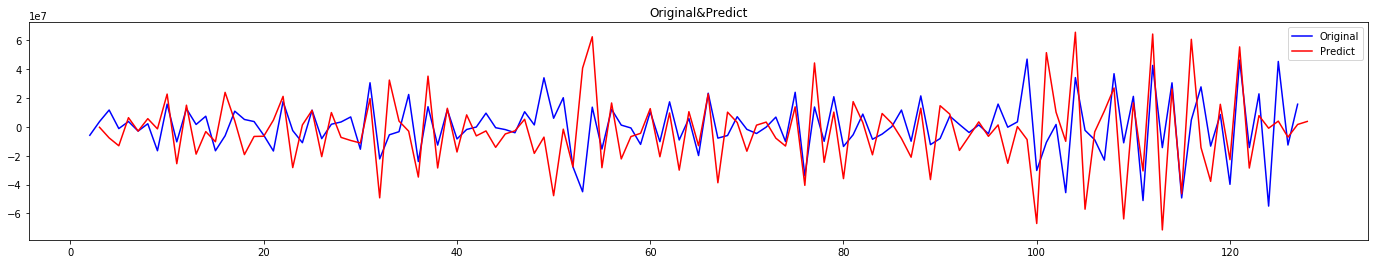

In [455]:
Orig_Pred_Plot(diff1, train_pred_ARIMA_fu_series_2)

In [352]:
y_pred_2 = train_pred_ARIMA_fu_series_2[118:125]
y_test_2 = diff1[120:127]

In [377]:
#y_pred_2

In [373]:
y_pred_2.values[6]

1646695.7411658135

In [360]:
y_test_2 = np.array(y_test_2)
y_test_2

array([ 46335651., -14365677.,  22879153., -54973400.,  45352898.,
       -12606304.,  15683662.])

In [378]:
y_test_2 = pd.Series(y_test_2, index=(range(121,128)))
#y_test_2

In [385]:
#for i in range(len(y_pred_2)):
#    print(i)

In [13]:
#Root Mean Squared Error, RMSE
def sum_erro(y_pred, y_test):
    sum_mean=0
    for i in range(len(y_pred)):
        sum_mean+=(y_pred.iloc[i]-y_test.values[i])**2
    sum_erro=np.sqrt(sum_mean/len(y_pred))  
    return sum_erro

In [376]:
sum_erro(y_pred_2, y_test_2)

27697188.323331803

In [397]:
#----------------ts_date-------------------#

In [4]:
# importing data
df = pd.read_csv("C:/Users/10910/Desktop/train_new.csv",  
                    low_memory = False)
# remove closed stores and those with no sales
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]
# sales for the store number 1 (StoreType C)
sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]
# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

In [6]:
sales=sales.set_index(sales['Date'])
sales["Sales"] = np.log1p(sales["Sales"])
sales.head()

,Date,Sales
Date,,
2/1/2013,2/1/2013,8.618124
3/1/2013,3/1/2013,8.372861
4/1/2013,4/1/2013,8.408940
5/1/2013,5/1/2013,8.516793
7/1/2013,7/1/2013,8.878637


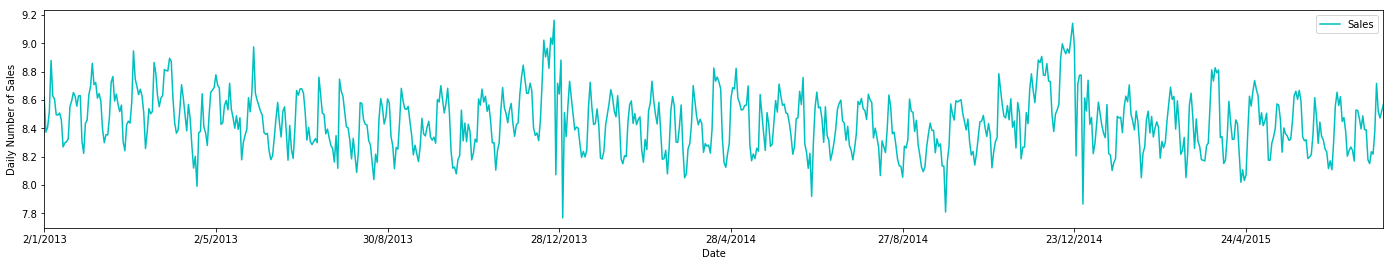

In [7]:
# plot daily sales
ax = sales.set_index('Date').plot(figsize = (24, 4), color = 'c')
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [14]:
test_stationarity(sales.Sales)

Results of Dickey-Fuller Test:
Test Statistic                  -3.772241
p-value                          0.003204
#Lags Used                      21.000000
Number of Observations Used    759.000000
Critical Value (1%)             -3.438995
Critical Value (5%)             -2.865355
Critical Value (10%)            -2.568802
dtype: float64


In [15]:
order_confirmation(sales.Sales)

the AIC is(6, 3),
the BIC is(6, 3)
 the HQIC is(6, 3)


In [18]:
sales_fit_ARMA = ARMA(sales.Sales, (6,3)).fit()
sales_pred_ARMA = sales_fit_ARMA.predict()

In [19]:
#sales_pred_ARMA
sales['Predict'] = sales_pred_ARMA
sales.head()

,Date,Sales,Predict
Date,,,
2/1/2013,2/1/2013,8.618124,8.446910
3/1/2013,3/1/2013,8.372861,8.560606
4/1/2013,4/1/2013,8.408940,8.401358
5/1/2013,5/1/2013,8.516793,8.388050
7/1/2013,7/1/2013,8.878637,8.517406


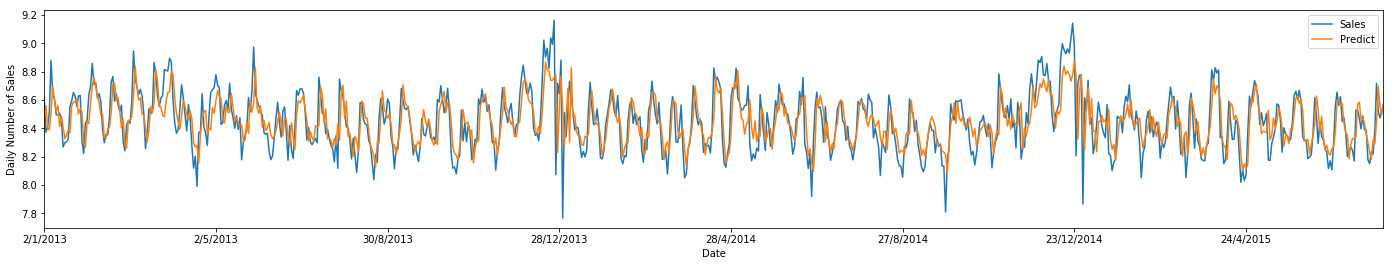

In [20]:
ax = sales.set_index('Date').plot(figsize = (24, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [498]:
#sales_pred_ARMA.iloc[0:5]
#type(sales.Sales.iloc[0:700])

In [21]:
sales_fit = ARMA(sales.Sales.iloc[0:700], (6,3)).fit()
sales_pred = sales_fit.predict(start=0,end=780)

In [22]:
sales_pred = np.array(sales_pred)
sales['Sales_700_pred'] = sales_pred
sales_700_pred = sales[['Date', 'Sales', 'Sales_700_pred']]
#sales_700_pred

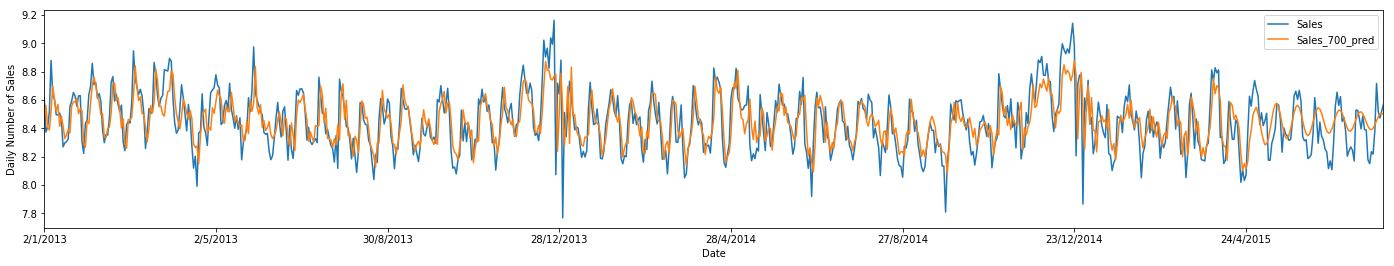

In [23]:
ax = sales_700_pred.set_index('Date').plot(figsize = (24, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

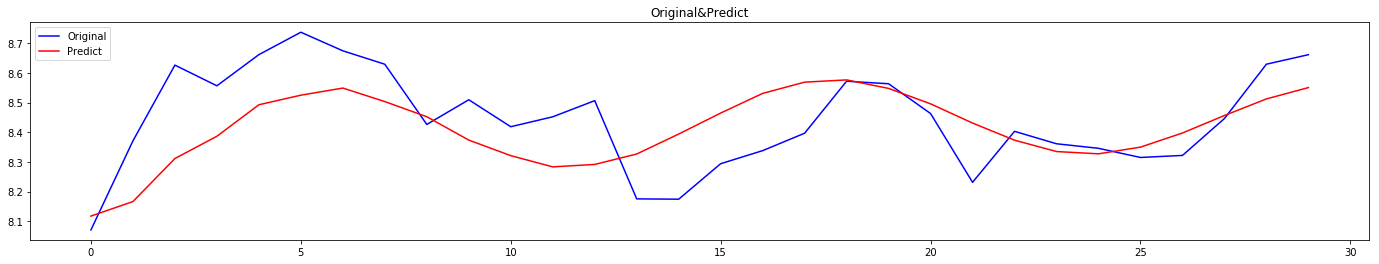

In [32]:
Y_pred = sales_pred[700:730]
Y_test = np.array(sales.Sales.iloc[700:730])
Orig_Pred_Plot(Y_test, Y_pred)

In [29]:
sum_erro(pd.Series(Y_test), pd.Series(Y_pred))

0.14422130875455405

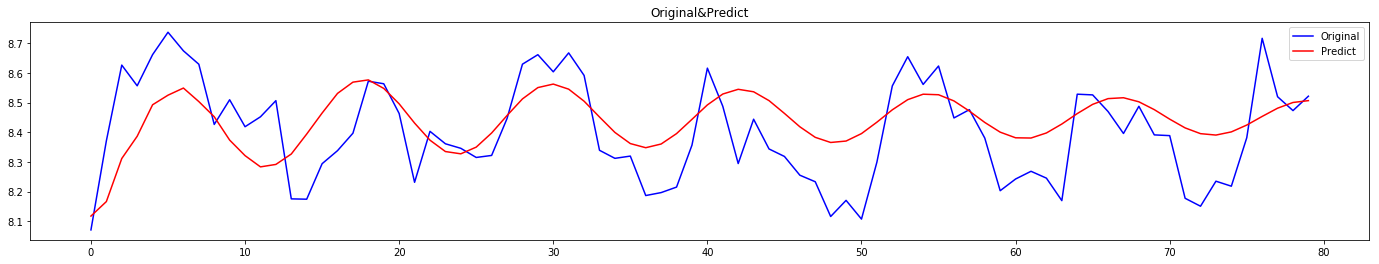

In [30]:
Y_pred_80 = sales_pred[700:780]
Y_test_80 = np.array(sales.Sales.iloc[700:780])
Orig_Pred_Plot(Y_test_80, Y_pred_80)

In [31]:
sum_erro(pd.Series(Y_test_80), pd.Series(Y_pred_80))

0.14300311494645435

In [564]:
#------------------time series analysis end------------------#
#------------------------------------------------------------#

In [2]:
for x in range(10, 100):
    print(x)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
